In [13]:
import procgen_tools
from procgen_tools.utils import setup

setup()  # create directory structure and download data

from procgen_tools.imports import *
from procgen_tools import (
    visualization,
    patch_utils,
    maze,
    vfield,
    vfield_stats,
    metrics,
)
import matplotlib.pyplot as plt

Already downloaded https://nerdsniper.net/mats/model_rand_region_5.pth


In [19]:
# Start a wandb run
import wandb

wandb.init()

Problem at: /tmp/ipykernel_294683/4229663857.py 3 <module>


Traceback (most recent call last):
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1170, in init
    run = wi.init()
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 730, in init
    backend.interface.publish_header()
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/interface/interface.py", line 92, in publish_header
    self._publish_header(header)
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/interface/interface_shared.py", line 324, in _publish_header
    self._publish(rec)
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/interface/interface_sock.py", line 51, in _publish
    self._sock_client.send_record_publish(record)
  File "/home/turneale/miniconda3/envs/MATS/lib/python3.10/site-packages/wandb/sdk/lib/sock_client.py", line 221, in send_record_publish
    self.send_s

Error: An unexpected error occurred

AttributeError: 'CategoricalPolicy' object has no attribute 'loss'

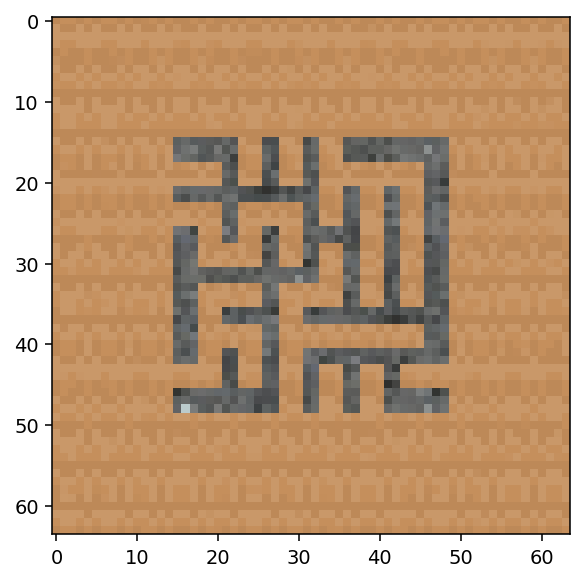

In [17]:
# Start an optimizer
import torch

optim = torch.optim.Adam(policy.parameters(), lr=1e-3)

# L2 loss between two vectors
loss_fn = torch.nn.MSELoss()

# Load the data
epochs: int = 100
seeds = range(4)
for epoch in range(epochs):
    for seed in seeds:
        # Load the data
        cheese_pair = maze.get_cheese_venv_pair(seed=seed)
        obs_pair = cheese_pair.reset().astype(np.float32)
        obs_pair = rearrange(obs_pair, "b c h w -> b h w c")

        plt.imshow(obs_pair[1])
        obs_pair = torch.from_numpy(obs_pair)

        # Train the policy
        for i in range(100):
            cheese_activ, no_cheese_activ = patch_utils.values_from_venv(
                layer_name=default_layer, hook=hook, venv=cheese_pair
            )
            optim.zero_grad()
            loss = loss_fn(
                cheese_activ, no_cheese_activ
            )  # no_cheese is the target
            # TODO maybe optimize no_cheese to be the same as original?
            loss.backward()
            optim.step()

        # Log the results
        wandb.log({"loss": loss.item(), "epoch": epoch, "seed": seed})

In [ ]:
wandb.exit()